In [2]:
import os
from shutil import copyfile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = './VOCdevkit/VOC2012/'

In [3]:
files_all = os.listdir('./VOCdevkit/VOC2012/ImageSets/Main/')

In [4]:
classes = []
for each_file in files_all:
    name  = each_file.split('_')[0]
    if name not in classes and not name.endswith('.txt'):
        classes.append(name)
classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [5]:
train_images_list = []

for each_class in classes:
    train_images_list.append(each_class + '_val.txt')
train_images_list

['aeroplane_val.txt',
 'bicycle_val.txt',
 'bird_val.txt',
 'boat_val.txt',
 'bottle_val.txt',
 'bus_val.txt',
 'car_val.txt',
 'cat_val.txt',
 'chair_val.txt',
 'cow_val.txt',
 'diningtable_val.txt',
 'dog_val.txt',
 'horse_val.txt',
 'motorbike_val.txt',
 'person_val.txt',
 'pottedplant_val.txt',
 'sheep_val.txt',
 'sofa_val.txt',
 'train_val.txt',
 'tvmonitor_val.txt']

In [6]:
true_classes = {}
print(path)
for each_file in train_images_list:
    class_name = each_file.split('_')[0]
    true_files = []
    with open(path + 'ImageSets/Main/' + each_file, 'r') as train_file:
        for line in train_file:
            f_name, label = line.strip().split()
            if label == '1':
                true_files.append(f_name)
        true_classes[class_name] = true_files

./VOCdevkit/VOC2012/


In [7]:
true_classes.keys()

dict_keys(['pottedplant', 'bicycle', 'tvmonitor', 'motorbike', 'chair', 'car', 'bird', 'boat', 'sofa', 'bottle', 'bus', 'diningtable', 'person', 'sheep', 'dog', 'cow', 'aeroplane', 'train', 'horse', 'cat'])

In [8]:
annot_path = './VOCdevkit/VOC2012/Annotations/'

In [10]:
for class_name, files in true_classes.items():
    src_path_annots = './VOCdevkit/VOC2012/Annotations/'
    src_path_images = './VOCdevkit/VOC2012/JPEGImages/'
    
    if not os.path.exists('./data_val/' + 'images'):
        os.makedirs('./data_val/' + 'images')
        os.makedirs('./data_val/' + 'annotations')
    os.makedirs(os.path.join('./data_val', 'images', class_name))
    os.makedirs(os.path.join('./data_val', 'annotations', class_name))
    dest_path_images = os.path.join('./data_val/','images', class_name + '/')
    dest_path_annots = os.path.join('./data_val/','annotations', class_name + '/')
        
    for each_file in files:
        copyfile(src_path_images + each_file + '.jpg', dest_path_images + each_file + '.jpg')
        copyfile(src_path_annots + each_file + '.xml', dest_path_annots + each_file + '.xml')

In [11]:
def get_class_distrib(top_level_direc, plot=False):
    classes = {}
    dirs = os.listdir(top_level_direc)
    for each_dir in dirs:
        full_path = os.path.join(top_level_direc, each_dir)
        class_count = len(os.listdir(full_path))
        classes[each_dir] = class_count
    if plot:
        plt.figure(figsize=(20, 8))
        x, y = list(classes.keys()), list(classes.values())
        x_dummy = range(len(x))
        rects = plt.bar(x_dummy, y, align='center')
        autolabel(rects)
        plt.xticks(x_dummy, x)
        plt.show()
    return classes

In [12]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,'%d' % int(height),ha='center', va='bottom')

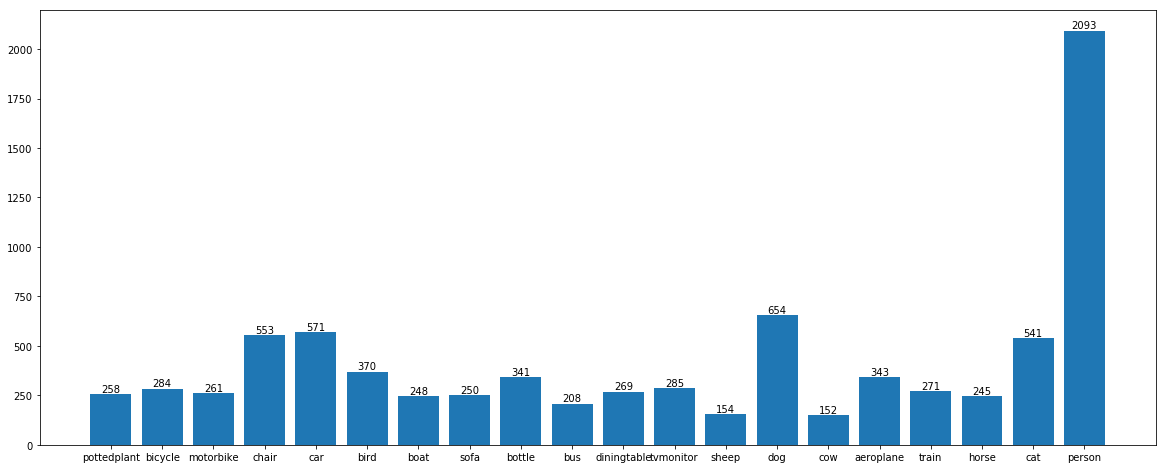

{'aeroplane': 343,
 'bicycle': 284,
 'bird': 370,
 'boat': 248,
 'bottle': 341,
 'bus': 208,
 'car': 571,
 'cat': 541,
 'chair': 553,
 'cow': 152,
 'diningtable': 269,
 'dog': 654,
 'horse': 245,
 'motorbike': 261,
 'person': 2093,
 'pottedplant': 258,
 'sheep': 154,
 'sofa': 250,
 'train': 271,
 'tvmonitor': 285}

In [13]:
get_class_distrib('./data_val/images/', plot=True)

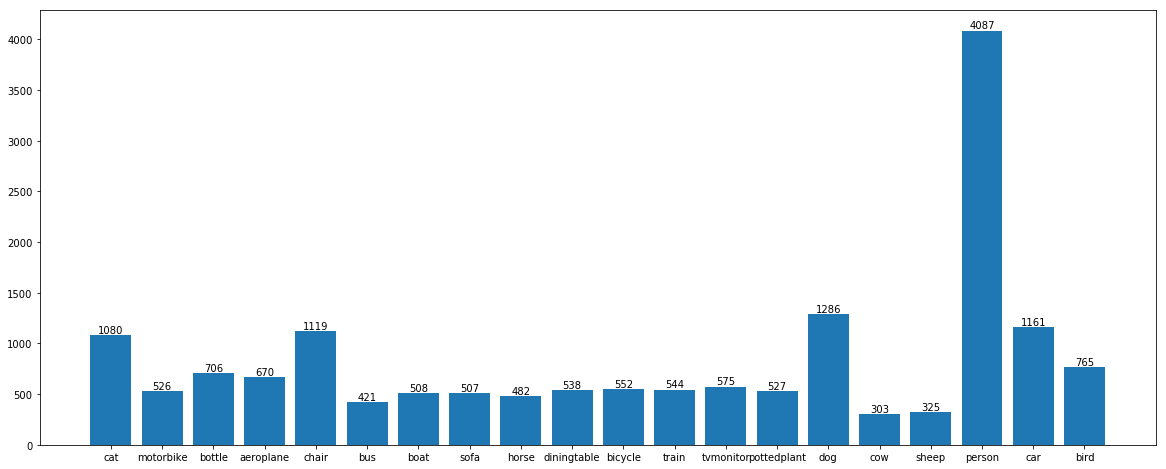

In [26]:
dict_classes = get_class_distrib('./dataset/images/', plot=True)

In [29]:
keys = dict_classes.values()

In [31]:
total = 0

for each_val in keys:
    total += each_val
total

16682

In [10]:
import xml.etree.ElementTree as etree

In [30]:
# checking whether there is only one label in a give image
# 1. Parse xml file for objects
# 2. count number of same object instances
# 3. select only those files with one object instances

true_data_path = './dataset/annotations/'
classes = os.listdir(true_data_path)
na_files = {}
for each_class in classes:
    path = true_data_path + each_class
    files = os.listdir(path)
    files_list = []
    for each_file in files:
        count = 0
        xml_file = etree.parse(os.path.join(path, each_file))
        root = xml_file.getroot()
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls != each_class:
                continue
            count += 1
        if count > 1:
            files_list.append(each_file)
    na_files[each_class] = files_list

In [31]:
img_path = './dataset/images/'
annot_path = './dataset/annotations/'
for each_class, files in na_files.items():
    cmp_img_path = os.path.join(img_path, each_class)
    cmp_annot_path = os.path.join(annot_path, each_class)
    for each_file in files:
        fname = each_file.split('.')[0]
        os.remove(os.path.join(cmp_img_path, fname + '.jpg'))
        os.remove(os.path.join(cmp_annot_path, fname + '.xml'))

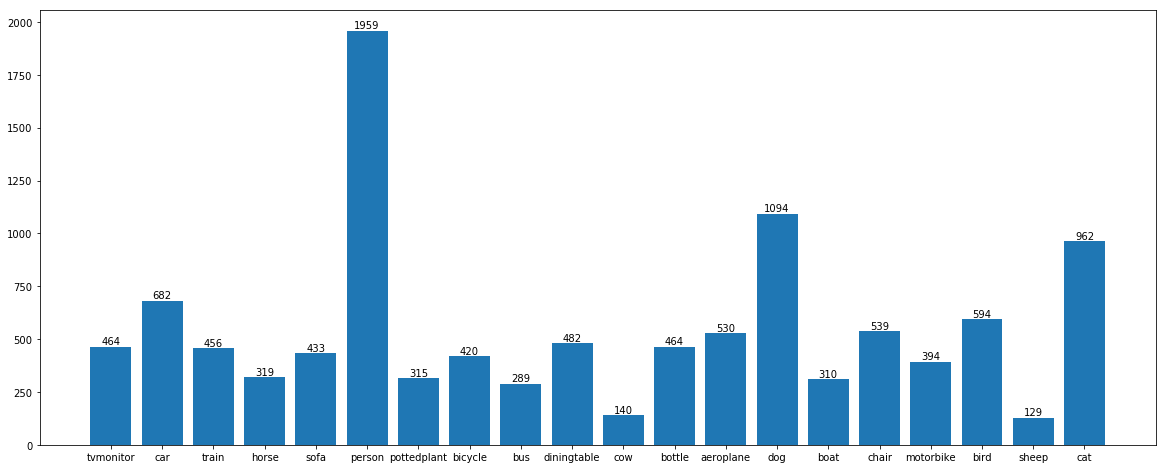

{'aeroplane': 530,
 'bicycle': 420,
 'bird': 594,
 'boat': 310,
 'bottle': 464,
 'bus': 289,
 'car': 682,
 'cat': 962,
 'chair': 539,
 'cow': 140,
 'diningtable': 482,
 'dog': 1094,
 'horse': 319,
 'motorbike': 394,
 'person': 1959,
 'pottedplant': 315,
 'sheep': 129,
 'sofa': 433,
 'train': 456,
 'tvmonitor': 464}

In [32]:
get_class_distrib('./dataset/images/', plot=True)

In [ ]:
# for validation dataset
files_all = os.listdir('./VOCdevkit/VOC2012/ImageSets/Main/')

In [25]:
# now I train the network on car, catm dog, bird, tvmonitor, chair, bottle, sofa, aeroplane, person

val_images_list = []

for each_class in classes:
    val_images_list.append(each_class + '_val.txt')
val_images_list

['horse_val.txt',
 'train_val.txt',
 'dog_val.txt',
 'tvmonitor_val.txt',
 'aeroplane_val.txt',
 'boat_val.txt',
 'sheep_val.txt',
 'pottedplant_val.txt',
 'diningtable_val.txt',
 'person_val.txt',
 'bird_val.txt',
 'bus_val.txt',
 'car_val.txt',
 'chair_val.txt',
 'bicycle_val.txt',
 'sofa_val.txt',
 'bottle_val.txt',
 'cat_val.txt',
 'motorbike_val.txt',
 'cow_val.txt']

In [28]:
true_classes = {}
for each_file in val_images_list:
    class_name = each_file.split('_')[0]
    true_files = []
    with open(path + 'ImageSets/Main/' + each_file, 'r') as train_file:
        for line in train_file:
            f_name, label = line.strip().split()
            if label == '1':
                true_files.append(f_name)
        true_classes[class_name] = true_files

In [29]:
for class_name, files in true_classes.items():
    src_path_annots = './VOCdevkit/VOC2012/Annotations/'
    src_path_images = './VOCdevkit/VOC2012/JPEGImages/'
    
    if not os.path.exists('./data_val/' + 'images'):
        os.makedirs('./data_val/' + 'images')
        os.makedirs('./data_val/' + 'annotations')
    os.makedirs(os.path.join('./data_val', 'images', class_name))
    os.makedirs(os.path.join('./data_val', 'annotations', class_name))
    dest_path_images = os.path.join('./data_val/','images', class_name + '/')
    dest_path_annots = os.path.join('./data_val/','annotations', class_name + '/')
        
    for each_file in files:
        copyfile(src_path_images + each_file + '.jpg', dest_path_images + each_file + '.jpg')
        copyfile(src_path_annots + each_file + '.xml', dest_path_annots + each_file + '.xml')

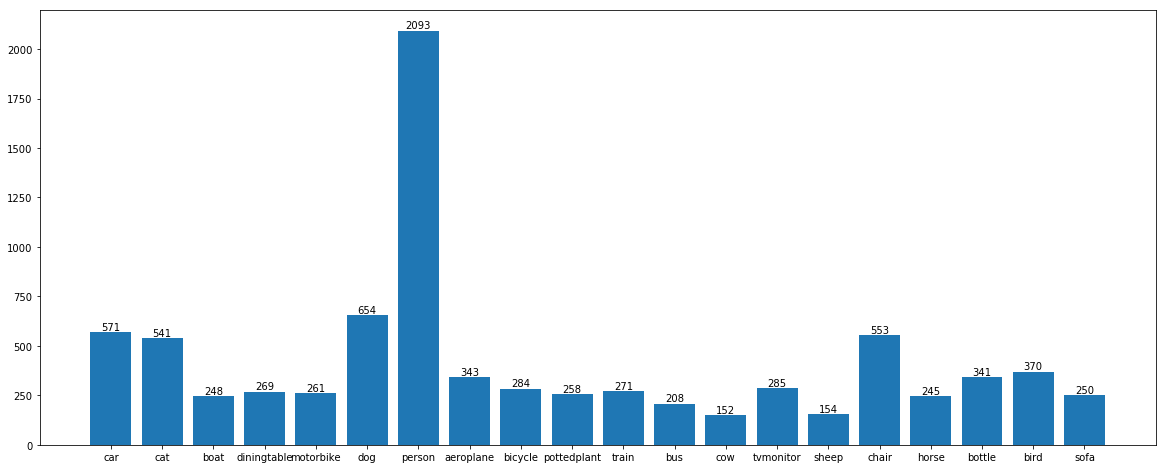

{'aeroplane': 343,
 'bicycle': 284,
 'bird': 370,
 'boat': 248,
 'bottle': 341,
 'bus': 208,
 'car': 571,
 'cat': 541,
 'chair': 553,
 'cow': 152,
 'diningtable': 269,
 'dog': 654,
 'horse': 245,
 'motorbike': 261,
 'person': 2093,
 'pottedplant': 258,
 'sheep': 154,
 'sofa': 250,
 'train': 271,
 'tvmonitor': 285}

In [30]:
get_class_distrib('./data_val/images/', plot=True)

In [31]:
true_data_path = './data_val/annotations/'
classes = os.listdir(true_data_path)
na_files = {}
for each_class in classes:
    path = true_data_path + each_class
    files = os.listdir(path)
    files_list = []
    for each_file in files:
        count = 0
        xml_file = etree.parse(os.path.join(path, each_file))
        root = xml_file.getroot()
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls != each_class:
                continue
            count += 1
        if count > 1:
            files_list.append(each_file)
    na_files[each_class] = files_list

In [32]:
img_path = './data_val/images/'
annot_path = './data_val/annotations/'
for each_class, files in na_files.items():
    cmp_img_path = os.path.join(img_path, each_class)
    cmp_annot_path = os.path.join(annot_path, each_class)
    for each_file in files:
        fname = each_file.split('.')[0]
        os.remove(os.path.join(cmp_img_path, fname + '.jpg'))
        os.remove(os.path.join(cmp_annot_path, fname + '.xml'))

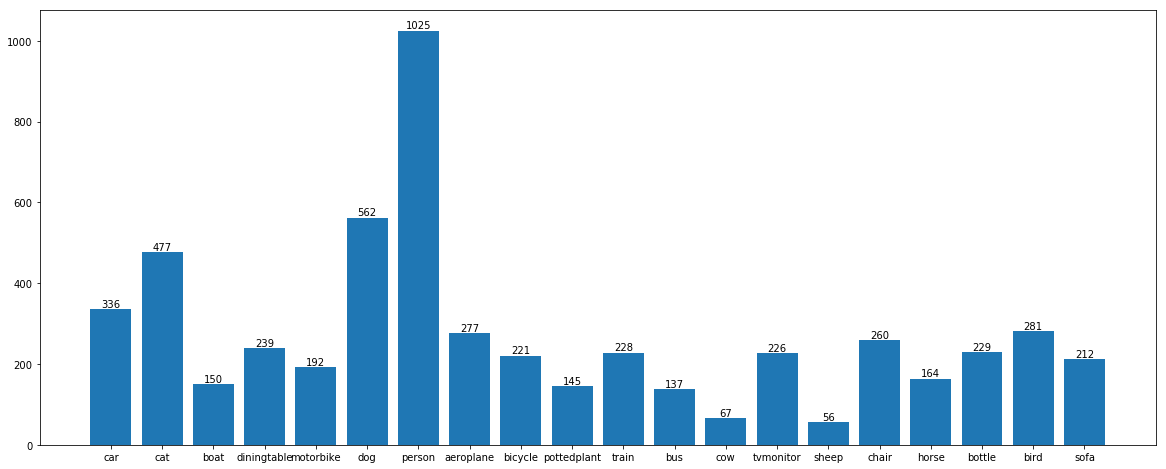

{'aeroplane': 277,
 'bicycle': 221,
 'bird': 281,
 'boat': 150,
 'bottle': 229,
 'bus': 137,
 'car': 336,
 'cat': 477,
 'chair': 260,
 'cow': 67,
 'diningtable': 239,
 'dog': 562,
 'horse': 164,
 'motorbike': 192,
 'person': 1025,
 'pottedplant': 145,
 'sheep': 56,
 'sofa': 212,
 'train': 228,
 'tvmonitor': 226}

In [33]:
get_class_distrib('./data_val/images/', plot=True)

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import os
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

In [3]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
        img = augment_brightness_camera_images(img)

    return img

In [4]:
def create_data(folder_path, num_files):
    full_path = os.path.abspath(folder_path)
    img_list = os.listdir(folder_path)
    for each_img in img_list:
        if each_img.endswith('jpg'):
            img = mpimg.imread(os.path.join(full_path, each_img))
            for _ in range(num_files):
                trans_img = transform_image(img,20,10,5,brightness=1)
                mpimg.imsave(os.path.join(full_path, each_img.split('.')[0]+'gen_'+str(_)+'.jpg'), trans_img)

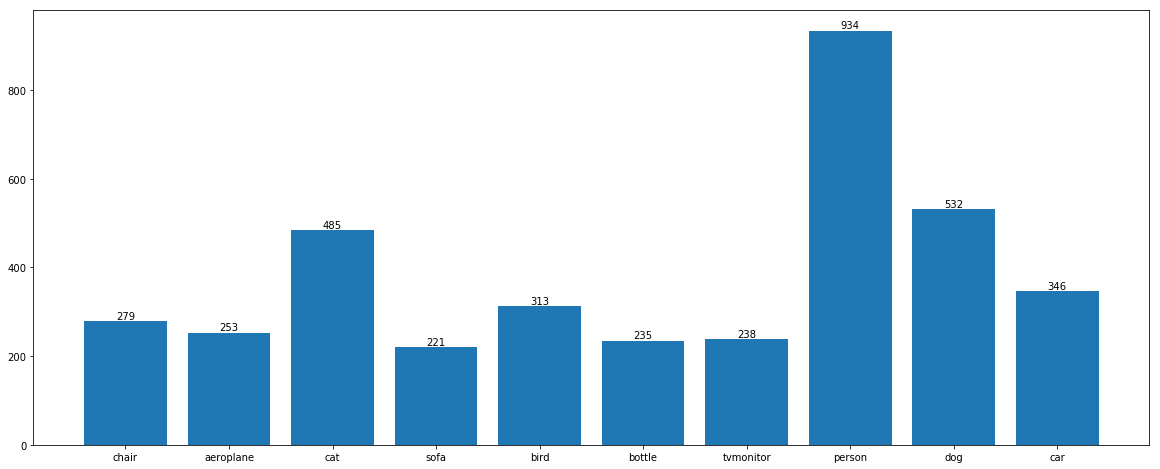

In [8]:
classes = get_class_distrib('./dataaug/images/', plot=True)

In [9]:
testing = 2000 // np.array(list(classes.values()))
testing

array([7, 7, 4, 9, 6, 8, 8, 2, 3, 5])

In [10]:
train_path = './dataaug/images/'

In [11]:
for num, each_class in enumerate(classes.keys()):
    print('started additional data generation')
    create_data(os.path.join(train_path, each_class), testing[num])
    print("Generation completed for ", each_class)

started additional data generation
Generation completed for  chair
started additional data generation
Generation completed for  aeroplane
started additional data generation
Generation completed for  cat
started additional data generation
Generation completed for  sofa
started additional data generation
Generation completed for  bird
started additional data generation
Generation completed for  bottle
started additional data generation
Generation completed for  tvmonitor
started additional data generation
Generation completed for  person
started additional data generation
Generation completed for  dog
started additional data generation
Generation completed for  car


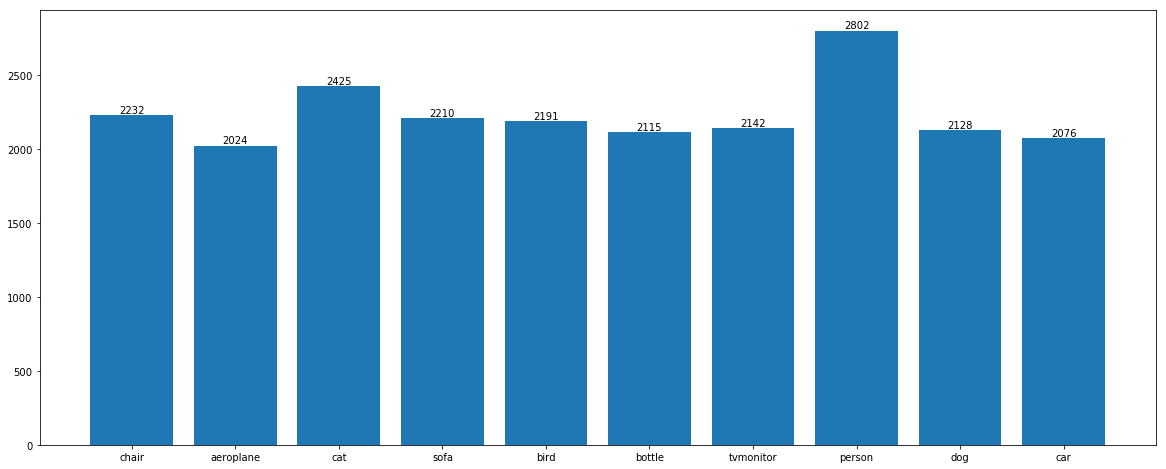

In [12]:
classes = get_class_distrib('./dataaug/images/', plot=True)

In [2]:
! mkdir dataset